# Kaggle Pokemon dataset

https://www.kaggle.com/datasets/alopez247/pokemon

In [1]:
from utils import *

%matplotlib inline

In [2]:
raw_data = pd.read_csv("pokemons.csv")

print("%d - TRAIN number of samples" % raw_data.shape[0])
print("%d - TRAIN number of columns \n" % raw_data.shape[1])
raw_data.head()

721 - TRAIN number of samples
23 - TRAIN number of columns 



,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
const_features = [f for f in raw_data.columns if raw_data[f].nunique() == 1]
if const_features:
    print("WARNING! Detected %d columns in training with constant values." % len(const_features))
print(const_features)

[]


In [4]:
# Manual definition of categorical features
cat_features = ["Type_1", "Type_2", "Generation", "Color", "hasGender", 
                "Egg_Group_1", "Egg_Group_2", "hasMegaEvolution", "Body_Style"]
num_features = ["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", 
                "Pr_Male", "Height_m", "Weight_kg", "Catch_Rate"]
target_col = "isLegendary"

features = cat_features + num_features

print(f"Numerical features: {num_features}")
print(f"Categorical features: {cat_features}")
print(f"Target: {target_col}")

Numerical features: ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Pr_Male', 'Height_m', 'Weight_kg', 'Catch_Rate']
Categorical features: ['Type_1', 'Type_2', 'Generation', 'Color', 'hasGender', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Body_Style']
Target: isLegendary


## Data quality checks

Features and their missing percentages

In [5]:
miss = (raw_data.isnull().sum() / raw_data.shape[0] * 100).to_frame()
miss.columns = ["miss_perc"]
miss[miss["miss_perc"] > 0].sort_values("miss_perc", ascending=False)

,miss_perc
Egg_Group_2,73.509015
Type_2,51.456311
Pr_Male,10.679612


In [6]:
# Cast categorical features to string to avoid future inconsistencies
for c in cat_features:
    raw_data[c] = raw_data[c].astype(str)

## EDA

In [7]:
raw_data.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,1.000000,14.500000,950.000000,255.000000


In [8]:
vis_num_features = num_features

vis_cat_features = cat_features

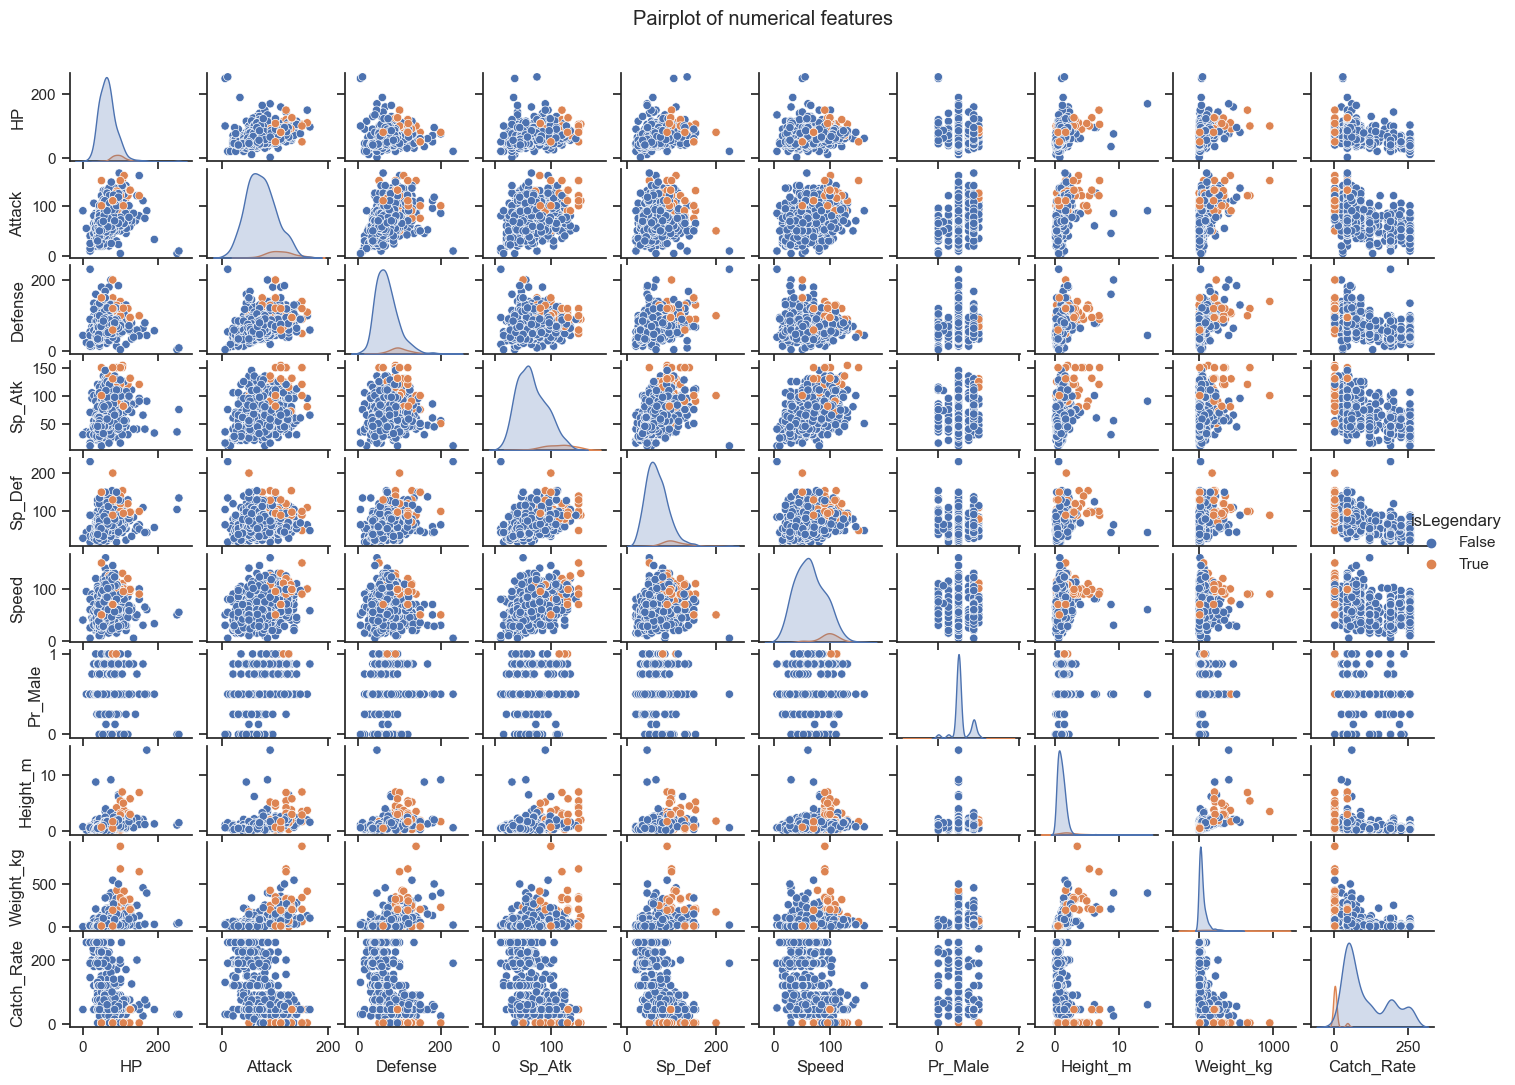

In [24]:
pairplot = sns.pairplot(raw_data, hue=target_col, vars=vis_num_features)
pairplot.fig.set_size_inches(15,10)
pairplot.fig.suptitle("Pairplot of numerical features", y=1.05);

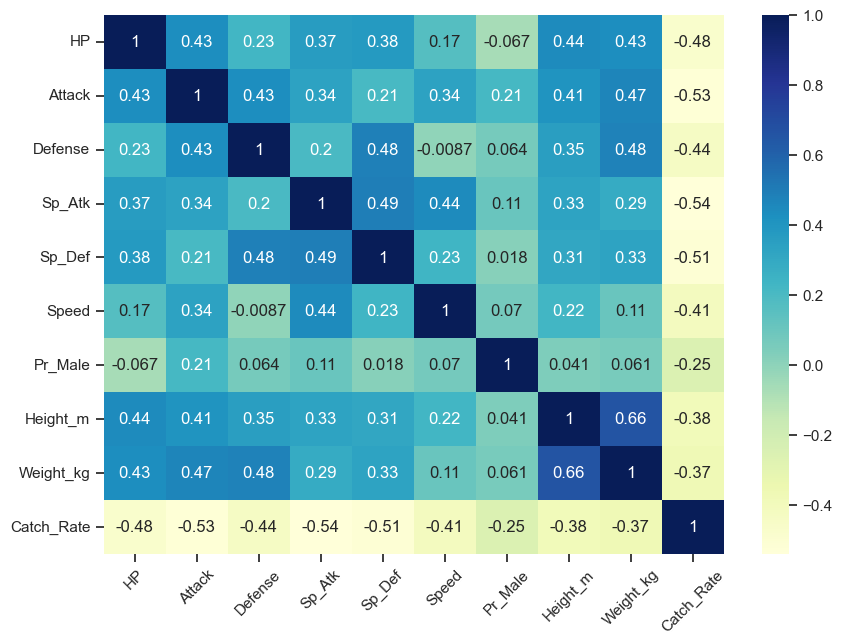

In [23]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(raw_data[num_features].corr(), cmap="YlGnBu", annot=True)
plt.xticks(rotation=45);

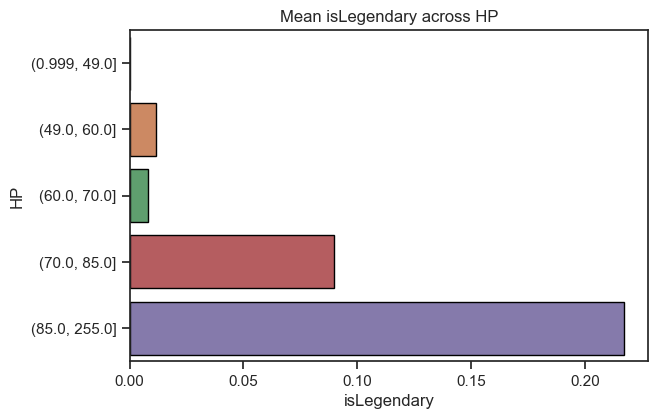

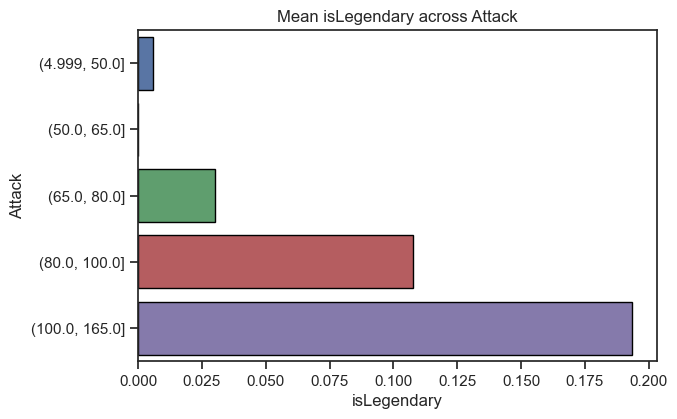

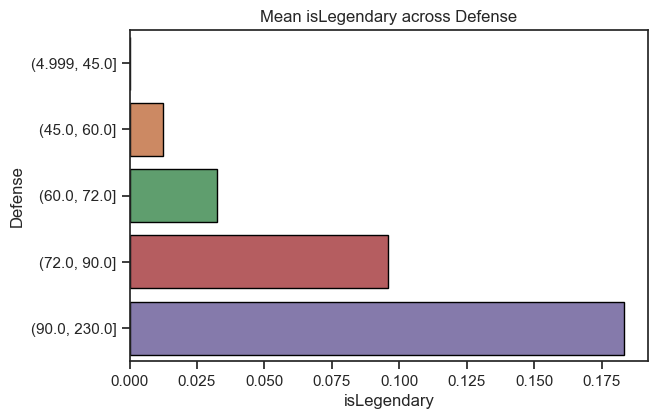

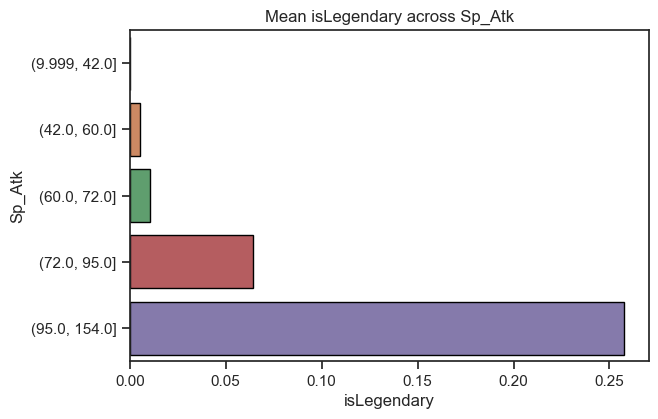

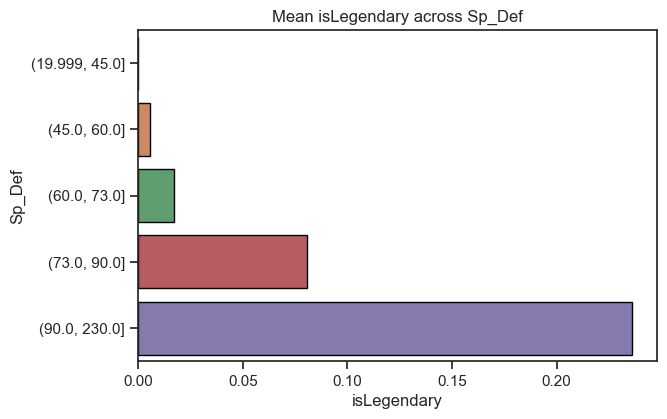

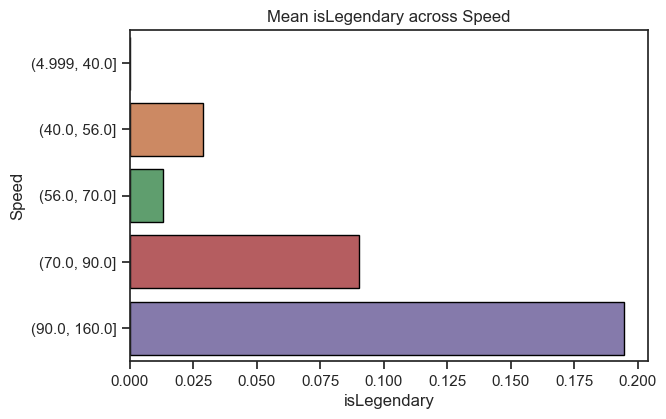

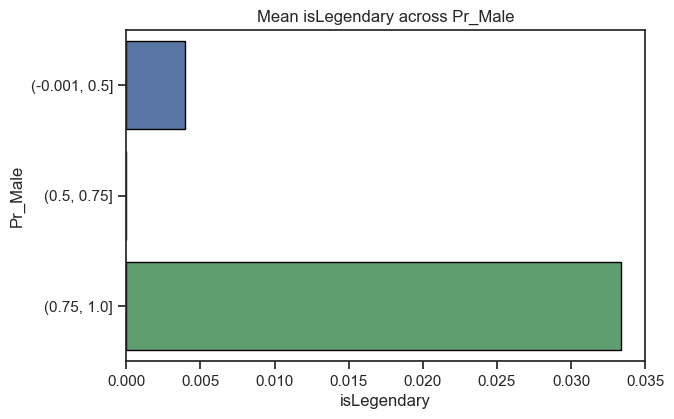

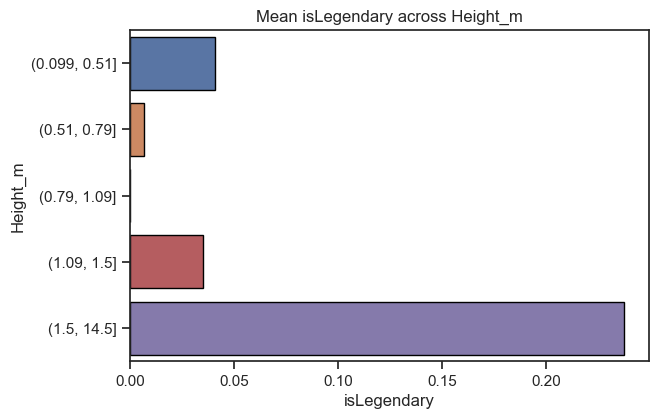

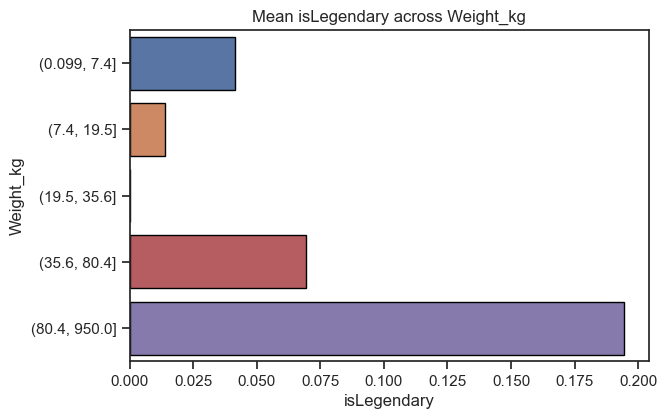

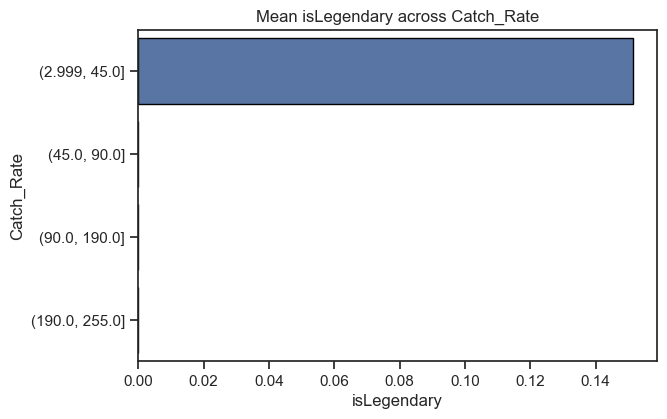

In [17]:
for feat in vis_num_features:
    num_bar_plot(raw_data, target_col, feat);

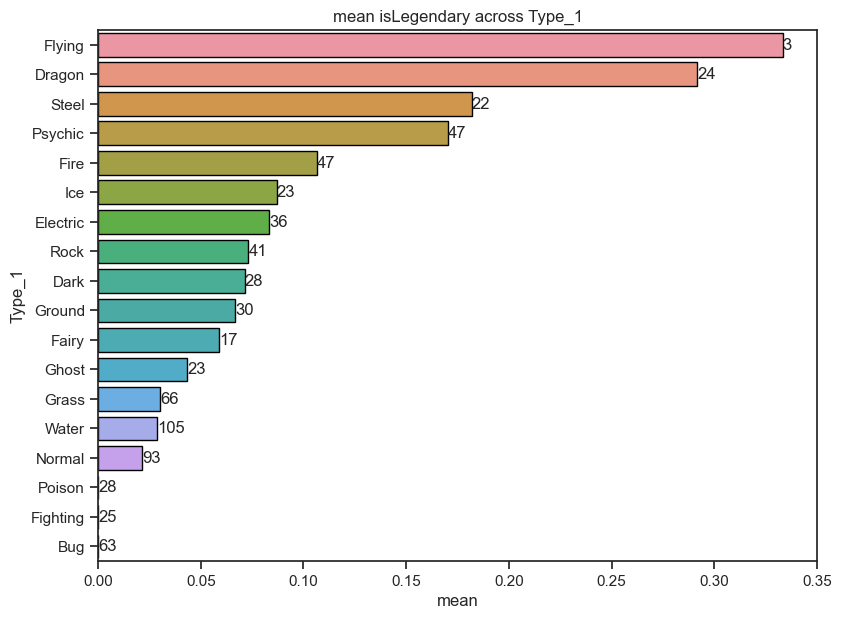

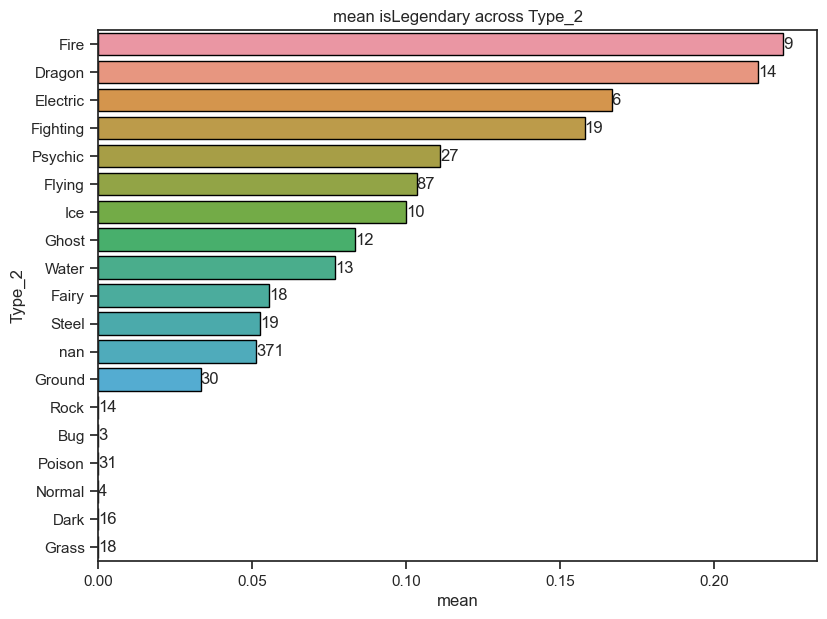

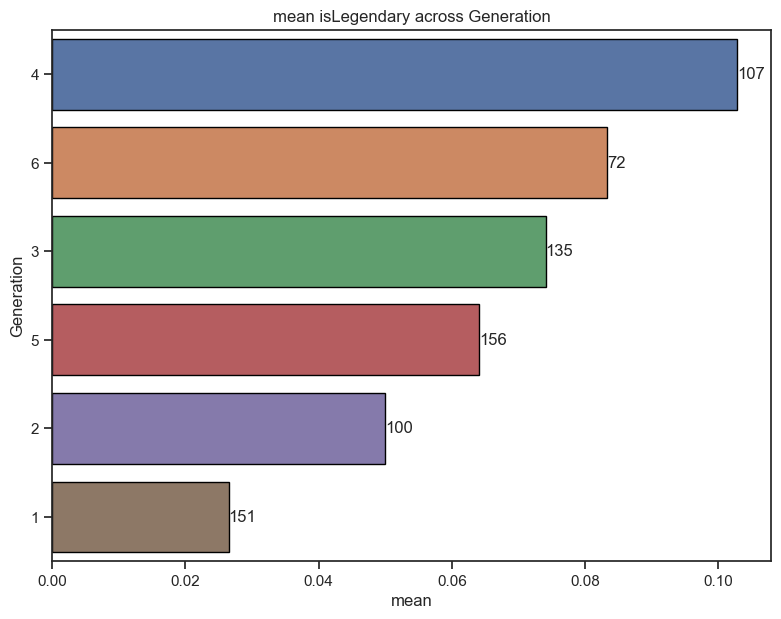

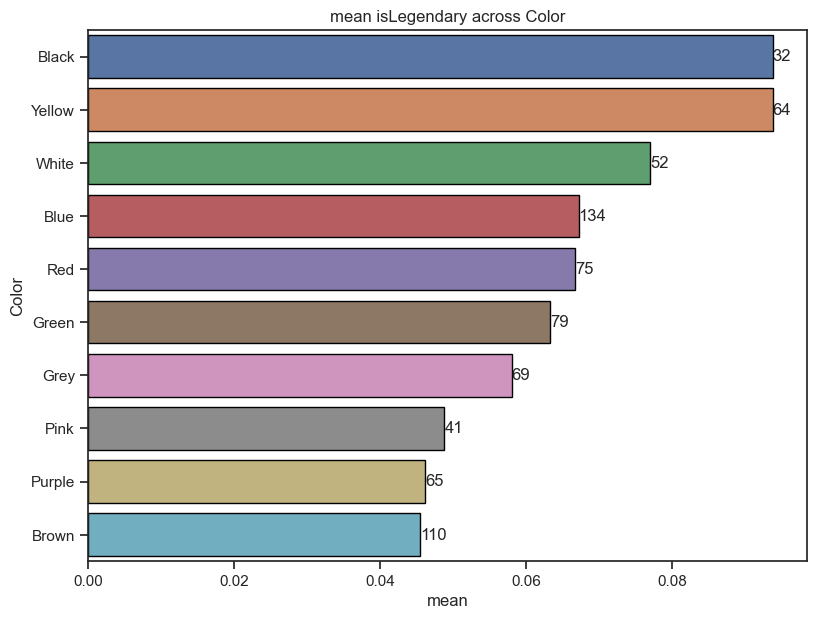

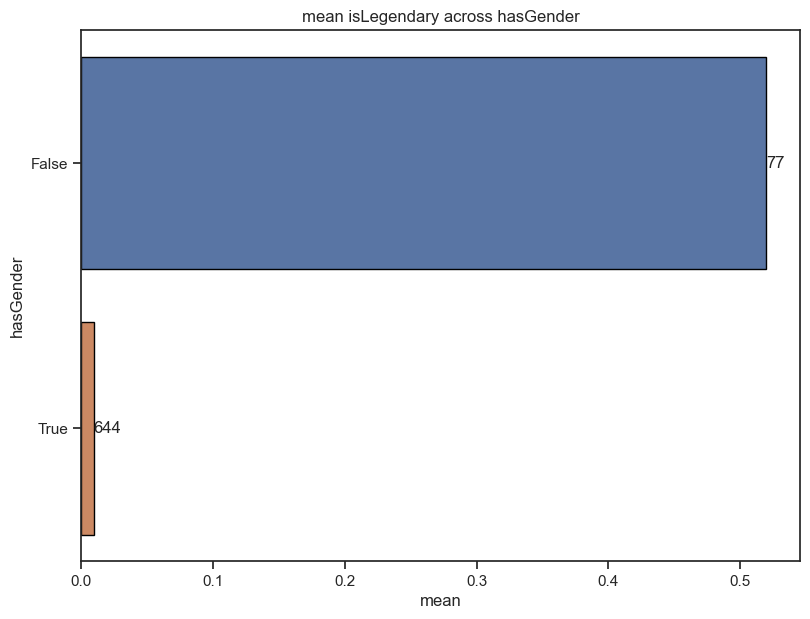

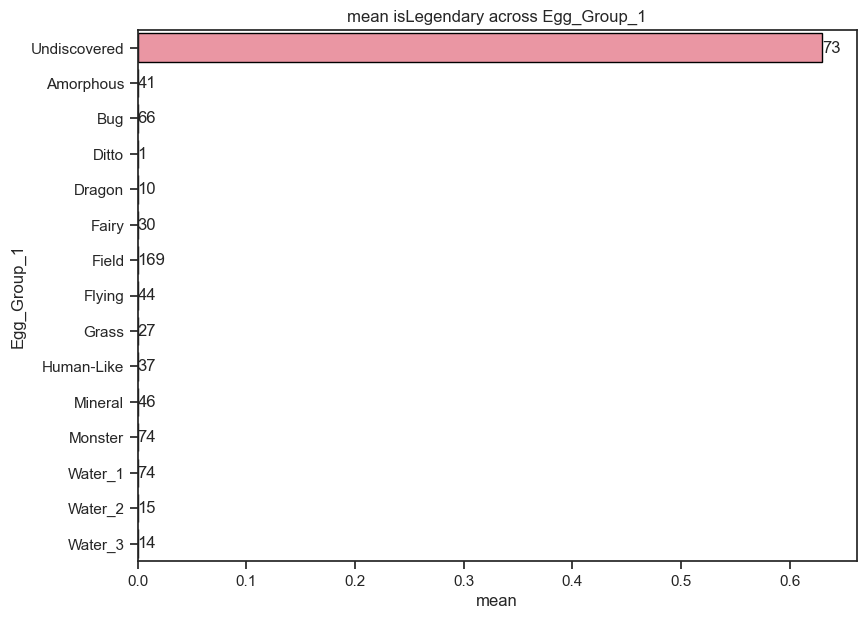

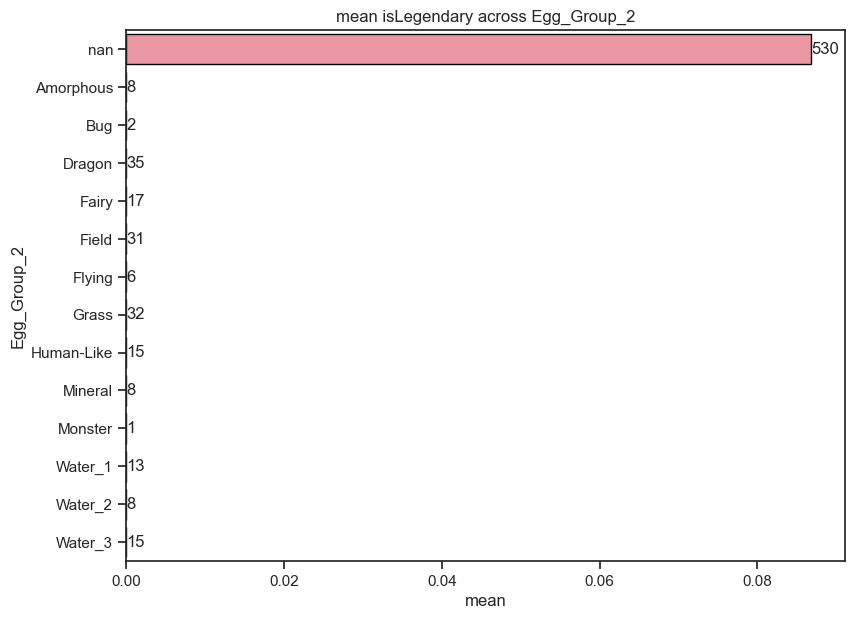

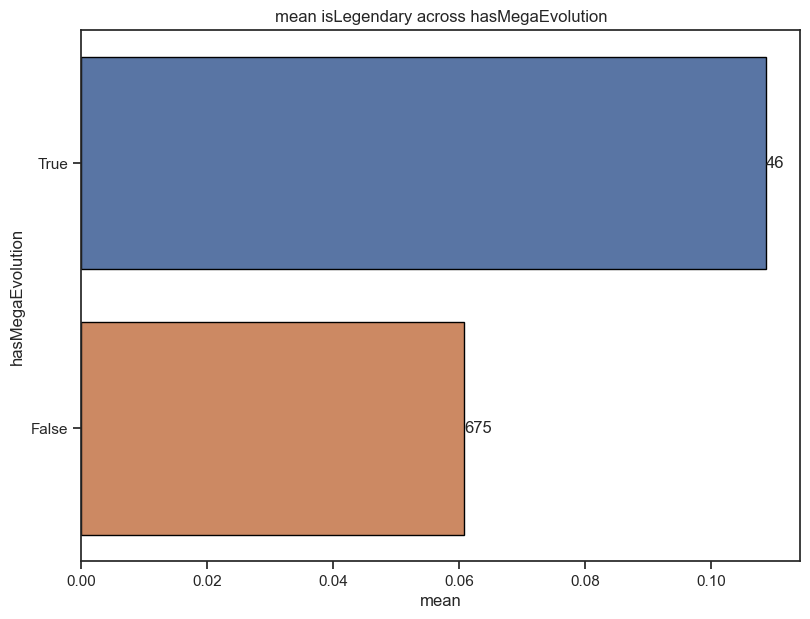

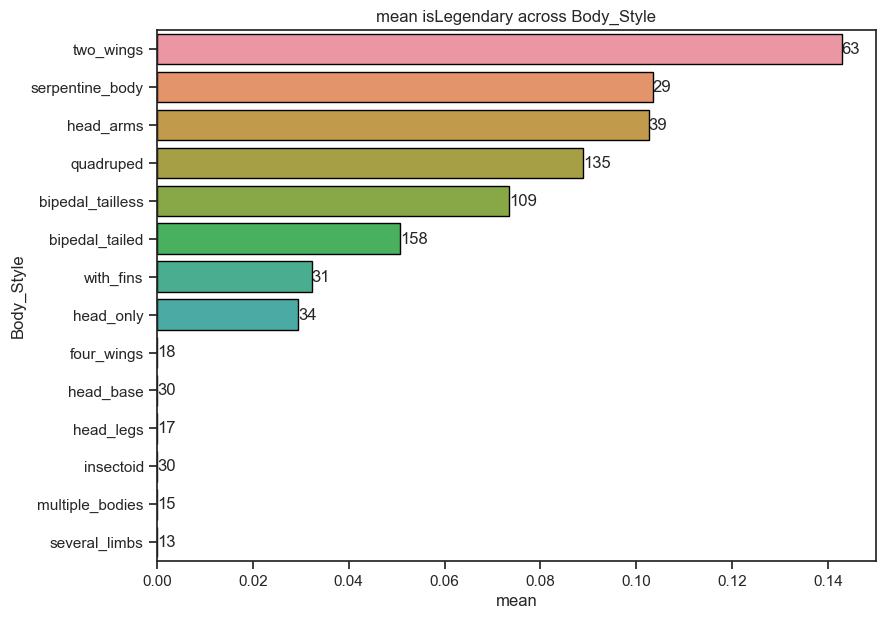

In [18]:
for feat in vis_cat_features:
    fig = cat_bar_plot(raw_data, feat, target_col, agg_func_name="mean")

## Classification

### Data preprocessing

### PCA clustering

In [ ]:
pca = PCA(n_components=2)
reduced_X_train_val = pca.fit_transform(X_train_val_base)

plt.figure(figsize=(10, 5))
plt.title('PCA feature reduction')
sns.scatterplot(x=reduced_X_train_val[:, 0], y=reduced_X_train_val[:, 1], hue=y_train_val_true);

Although we did just a simple feature reduction technic we may already observe that people who subscribed a term deposit *clusterize* together. That is a good sign we may built a good model.<br>

### Simple Logistic Regression

In [ ]:
lr = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=1500)

param_grid = {'C': [10 ** k for k in range(-8, 6)]}
grid = GridSearchCV(lr, param_grid, scoring=metric["scorer"], return_train_score=True)
grid.fit(X_train_val_base, y_train_val_true);

In [ ]:
param = 'param_C'
param_values = grid.cv_results_[param].data
train_score = grid.cv_results_['mean_train_score']
test_score = grid.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(10, 5))
x_line = list(range(len(param_values)))
sns.lineplot(x_line, train_score, label = 'Train', ax=ax)
sns.lineplot(x_line, test_score, label = 'Validation', ax=ax)
ax.xaxis.set_ticks(x_line)
ax.xaxis.set_ticklabels(param_values)
plt.xlabel('Inversed regularization strength')
plt.ylabel(metric['name'])
plt.title('Learning curve of Logistic Regression')
ax.legend();

In [ ]:
best_lr_params = grid.best_estimator_.get_params()
best_lr = LogisticRegression(**best_lr_params)
best_lr.fit(X_train_val_base, y_train_val_true)
y_test_probs = grid.best_estimator_.predict_proba(X_test_base)[:, 1]
y_test_preds = grid.best_estimator_.predict(X_test_base)

print("Validation report")
print(classification_report(y_test_true, y_test_preds))
RocCurveDisplay.from_predictions(y_test_true, y_test_probs)
plt.title("Validation ROC-curve");

**Feature Importance**

In [ ]:
top_n = 15

lr_feat_imp = pd.DataFrame({"weight": best_lr.coef_[0], "feature": base_pipe.transformed_names_})
lr_feat_imp["abs_weight"] = abs(lr_feat_imp["weight"])
lr_feat_imp = lr_feat_imp.sort_values(by=["abs_weight"])

fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Logistic Regression feature importance")
plt.xlabel("feature weight")
plt.barh(y="feature", width="weight", data=lr_feat_imp[-top_n:]);

### Random forest classifier

## Clustering